In [1]:
# Question 02
import numpy as np
import tensorflow as tf

# 1. Define the 5×5 input matrix
input_data = np.array([
    [1, 2, 3, 4, 5],
    [4, 5, 6, 7, 8],
    [7, 8, 9, 10, 11],
    [10, 11, 12, 13, 14],
    [13, 14, 15, 16, 17]
], dtype=np.float32)

# 2. Define the 3×3 kernel
kernel_data = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
], dtype=np.float32)

# TensorFlow expects data in [batch, height, width, channels] format
# So we reshape the input and kernel accordingly
input_tf = tf.constant(input_data.reshape((1, 5, 5, 1)), dtype=tf.float32)
kernel_tf = tf.constant(kernel_data.reshape((3, 3, 1, 1)), dtype=tf.float32)

# 3. Perform convolution with various (stride, padding) combinations
configs = [
    (1, 'VALID'),
    (1, 'SAME'),
    (2, 'VALID'),
    (2, 'SAME')
]

for stride, pad in configs:
    conv_output = tf.nn.conv2d(
        input_tf,
        kernel_tf,
        strides=[1, stride, stride, 1],  # [batch_stride, row_stride, col_stride, channels_stride]
        padding=pad
    )
    # Remove batch and channel dimensions for easy viewing
    conv_output_2d = tf.squeeze(conv_output).numpy()
    print(f"Stride = {stride}, Padding = '{pad}':\n{conv_output_2d}\n")

Stride = 1, Padding = 'VALID':
[[25. 30. 35.]
 [40. 45. 50.]
 [55. 60. 65.]]

Stride = 1, Padding = 'SAME':
[[ 6. 12. 15. 18. 12.]
 [14. 25. 30. 35. 22.]
 [23. 40. 45. 50. 31.]
 [32. 55. 60. 65. 40.]
 [24. 36. 39. 42. 30.]]

Stride = 2, Padding = 'VALID':
[[25. 35.]
 [55. 65.]]

Stride = 2, Padding = 'SAME':
[[ 6. 15. 12.]
 [23. 45. 31.]
 [24. 39. 30.]]



In [2]:
'''

Question 1: Cloud Computing for Deep Learning (20 points)
Cloud computing offers significant advantages for deep learning applications.
(a) Define elasticity and scalability in the context of cloud computing for deep learning. (10 points)
(b) Compare AWS SageMaker, Google Vertex AI, and Microsoft Azure Machine Learning Studio in terms of their deep learning capabilities. (10 points)
Answer: 

	•	Elasticity: It refers to the ability of cloud resources to expand or shrink automatically based on workload demands. For example, if a deep learning model requires more GPUs during training, the cloud can allocate them dynamically and release them after training is done.
	•	Scalability: It means increasing the cloud infrastructure’s capacity to handle growing workloads efficiently. For instance, if a company wants to train larger models, they can add more servers or GPUs to improve performance.
	•	Key Difference: Elasticity is short-term and automatic, while scalability is long-term and planned for future growth.

Feature	   AWS 	                          Google	               Azaure
Ease of use 	Moderate	              High	                   High
AutoML	    Yes	                          Yes	                   Yes
GPU/TPU	Supports GPUs, Inferentia	Supports GPU/ TPU	Supports GPU/ FPGAs
Best For	Large Scale ML Training	Auto ML, Tensor Flow 	Enterpise AI

Summary:
	AWS SageMaker: Best for flexible, large-scale machine learning.
	Google Vertex AI: Best for AutoML and TensorFlow-based models.
	Azure ML Studio: Best for enterprise AI with Microsoft tools.





'''

'\n\nQuestion 1: Cloud Computing for Deep Learning (20 points)\nCloud computing offers significant advantages for deep learning applications.\n(a) Define elasticity and scalability in the context of cloud computing for deep learning. (10 points)\n(b) Compare AWS SageMaker, Google Vertex AI, and Microsoft Azure Machine Learning Studio in terms of their deep learning capabilities. (10 points)\nAnswer: \n\n\t•\tElasticity: It refers to the ability of cloud resources to expand or shrink automatically based on workload demands. For example, if a deep learning model requires more GPUs during training, the cloud can allocate them dynamically and release them after training is done.\n\t•\tScalability: It means increasing the cloud infrastructure’s capacity to handle growing workloads efficiently. For instance, if a company wants to train larger models, they can add more servers or GPUs to improve performance.\n\t•\tKey Difference: Elasticity is short-term and automatic, while scalability is lo

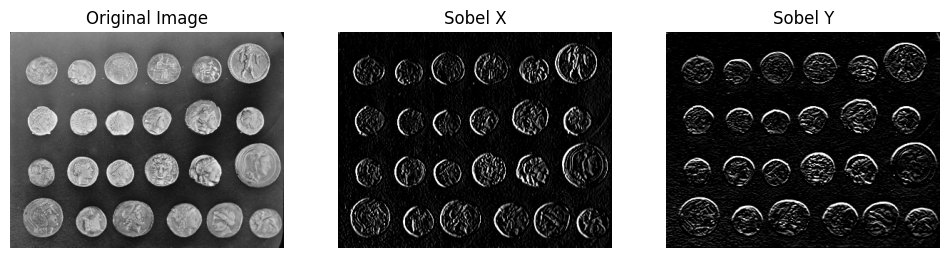

Original 4×4 Matrix:
 [[6. 3. 7. 4.]
 [6. 9. 2. 6.]
 [7. 4. 3. 7.]
 [7. 2. 5. 4.]]

Max-Pooled (2×2) Matrix:
 [[9. 7.]
 [7. 7.]]

Average-Pooled (2×2) Matrix:
 [[6.   4.75]
 [5.   4.75]]


In [3]:
# Question 03

import numpy as np
import requests
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from io import BytesIO

# Part 1: Sobel Edge Detection

# URL of a simple image (coins from scikit-image)
image_url = "https://raw.githubusercontent.com/scikit-image/scikit-image/v0.18.1/skimage/data/coins.png"

try:
    # 1. Fetch the image from the internet
    response = requests.get(image_url)
    response.raise_for_status()  # Raise an error if the request failed

    # 2. Convert response content to NumPy array, then decode into OpenCV format
    image_data = np.frombuffer(response.content, dtype=np.uint8)
    image = cv2.imdecode(image_data, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Could not decode image. Please check the image data.")
    else:
        # 3. Define Sobel Filters for X and Y directions
        sobel_x = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]], dtype=np.float32)

        sobel_y = np.array([[-1, -2, -1],
                            [ 0,  0,  0],
                            [ 1,  2,  1]], dtype=np.float32)

        # 4. Apply Sobel filters using filter2D
        edge_x = cv2.filter2D(src=image, ddepth=-1, kernel=sobel_x)
        edge_y = cv2.filter2D(src=image, ddepth=-1, kernel=sobel_y)

        # 5. Display images using Matplotlib
        fig, axs = plt.subplots(1, 3, figsize=(12, 4))

        axs[0].imshow(image, cmap='gray')
        axs[0].set_title('Original Image')
        axs[0].axis('off')

        axs[1].imshow(edge_x, cmap='gray')
        axs[1].set_title('Sobel X')
        axs[1].axis('off')

        axs[2].imshow(edge_y, cmap='gray')
        axs[2].set_title('Sobel Y')
        axs[2].axis('off')

        plt.show()

except requests.RequestException as e:
    print("Error fetching the image from URL:", e)


# Part 2: Max Pooling & Average Pooling

# 1. Create a random 4x4 matrix
np.random.seed(42)  # For reproducible results
input_matrix = np.random.randint(0, 10, size=(4, 4)).astype(np.float32)

print("Original 4×4 Matrix:\n", input_matrix)

# 2. Convert to TensorFlow tensor in [batch, height, width, channels]
input_tensor = tf.constant(input_matrix.reshape((1, 4, 4, 1)))

# 3. Apply 2x2 Max Pooling
max_pool = tf.nn.max_pool2d(
    input_tensor,
    ksize=2,    # 2x2 window
    strides=2,  # stride of 2
    padding='VALID'
)

# 4. Apply 2x2 Average Pooling
avg_pool = tf.nn.avg_pool2d(
    input_tensor,
    ksize=2,    # 2x2 window
    strides=2,  # stride of 2
    padding='VALID'
)

# 5. Squeeze to remove batch & channel dims
max_pooled = tf.squeeze(max_pool).numpy()
avg_pooled = tf.squeeze(avg_pool).numpy()

# 6. Print results
print("\nMax-Pooled (2×2) Matrix:\n", max_pooled)
print("\nAverage-Pooled (2×2) Matrix:\n", avg_pooled)

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np


# Code 1: Simplified AlexNet

def build_alexnet(input_shape=(227, 227, 3), num_classes=10):
    """
    Builds a simplified AlexNet model:
      1) Conv2D (96 filters, 11x11, stride=4), ReLU
      2) MaxPooling (3x3, stride=2)
      3) Conv2D (256 filters, 5x5), ReLU
      4) MaxPooling (3x3, stride=2)
      5) Conv2D (384 filters, 3x3), ReLU
      6) Conv2D (384 filters, 3x3), ReLU
      7) Conv2D (256 filters, 3x3), ReLU
      8) MaxPooling (3x3, stride=2)
      9) Flatten
      10) Dense (4096), ReLU
      11) Dropout (50%)
      12) Dense (4096), ReLU
      13) Dropout (50%)
      14) Output Dense (10 classes), Softmax
    """
    model = models.Sequential([
        layers.Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu',
                      input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(3, 3), strides=2),

        layers.Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=2),

        layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Build and summarize AlexNet
alexnet_model = build_alexnet()
print("===== AlexNet Model Summary =====")
alexnet_model.summary()
print("\n")


# Code 2: ResNet-like Architecture
def residual_block(input_tensor, filters=64):
    """
    Defines a simple residual block with:
      - Two Conv2D layers (filters=64, 3x3)
      - A skip connection adding the input to the final output
      - ReLU activation after the skip connection
    """
    x = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(input_tensor)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.add([x, input_tensor])  # Skip connection
    x = layers.Activation('relu')(x)
    return x

def build_resnet_like(input_shape=(224, 224, 3), num_classes=10):
    """
    Builds a simple ResNet-like model:
      1) Initial Conv2D (64 filters, 7x7, stride=2), ReLU
      2) MaxPooling (3x3, stride=2)
      3) Two residual blocks
      4) Flatten
      5) Dense(128), ReLU
      6) Dense(num_classes), Softmax
    """
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Two residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Build and summarize the ResNet-like model
resnet_like_model = build_resnet_like()
print("===== ResNet-like Model Summary =====")
resnet_like_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


===== AlexNet Model Summary =====


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)



===== ResNet-like Model Summary =====


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 112, 112, 64)   │          9,472 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 56, 56, 64)     │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 56, 56, 64)     │              0 │ conv2d_7[0][0],        │
│                           │                        │                │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 56, 56, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 56, 56, 64)     │              0 │ conv2d_9[0][0],        │
│                           │                        │                │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 56, 56, 64)     │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 200704)         │              0 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │     25,690,240 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 10)             │          1,290 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 25,848,714 (98.61 MB)

 Trainable params: 25,848,714 (98.61 MB)

 Non-trainable params: 0 (0.00 B)